In [1]:
import os
print(os.getcwd())

C:\Users\xvpow\ai_python20241203\Ch13_20250114


In [2]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'Ch13.ipynb', 'data.json', 'data.txt', 'data0.json', 'data1.txt', 'example.csv', 'example1.csv', 'example2.csv', 'json與csv用檔案.zip', 'result-readline.txt', 'score.json', 'score.txt', 'ttest.csv']


In [5]:
from os.path import join

path1 = "dir"
file = "image.png"
imgPath = join(path1,file)
print(imgPath)

dir\image.png


In [7]:
from os import walk
mypath = "."
for root,dirs,files in walk(mypath):
    print("路徑:",root)
    print("目錄:",dirs)
    print("檔案:",files)
    print("=======")

路徑: .
目錄: ['.ipynb_checkpoints', 'dir1', 'dir2']
檔案: ['Ch13.ipynb', 'data.json', 'data.txt', 'data0.json', 'data1.txt', 'example.csv', 'example1.csv', 'example2.csv', 'json與csv用檔案.zip', 'result-readline.txt', 'score.json', 'score.txt', 'ttest.csv']
路徑: .\.ipynb_checkpoints
目錄: []
檔案: ['Ch13-checkpoint.ipynb']
路徑: .\dir1
目錄: []
檔案: []
路徑: .\dir2
目錄: ['dir2_1']
檔案: []
路徑: .\dir2\dir2_1
目錄: []
檔案: []


## 檔案存取

file object = open(file_name [, access_mode])

UTF8 編碼資料還請加入另一個參數才可避免亂碼：encoding=‘utf-8'
file object = open(file_name [, access_mode])

參數說明

file_name：file_name 參數是一個字串資料，代表包含要連結的文件名稱。

access_mode：access_mode 確定文件必須打開的模式，包括讀取、寫入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為讀取(r)。

|模式	|可做操作|若檔案不存在|是否覆蓋|
|----|--------|-----------|-------|
|r	|只能讀|報錯	|-|
|r+	|可讀可寫|報錯|是|
|w	|只能寫|建立|是|
|w+ |可讀可寫|建立|是|
|a　|只能寫|建立|否，追加寫|
|a+	|可讀可寫|建立|否，追加寫|


In [9]:
text = """python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
"""
print(text,file = open("data.txt","w",encoding="utf-8"))


In [12]:
dataList = []
while True:
    score = input("請輸入數字")
    if score == "quit":
        break
    dataList.append(score)
file = open("score.txt","w",encoding="utf-8")
file.write(str(dataList))
file.close()


請輸入數字 55
請輸入數字 77
請輸入數字 62
請輸入數字 quit


In [14]:
f = open("data.txt","r",encoding = "UTF-8")
content = f.read()
print(content)
f.close()

python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。




## CSV
+ CSV 格式是資料庫最常用的導入和導出格式。
+ 資料均沒有類型，一切都是字串。
+ 沒有字體或顏色與儲存格寬度高度的設置。
+ Python 語法必須加入 import csv。
+ 讀取儲存格資料：
  + reader( )：依照每一列的編號 由0開始
  + DictReader( )
    + 以第一列的值為每一行的名稱，第一列不是資料
    + 也可以重新命名，但第一列必須是資料

### Read

In [17]:
import csv
f = open("example1.csv","r")
for row in csv.reader(f):
    if float(row[5]) > 100:       
        print(row[0],row[1],row[2])
f.close()        

 104/01/03 2,640,781,030 64,138,886,194
 104/01/17 3,720,277,205 101,133,309,290
 104/01/30 4,540,373,544 143,900,658,474
 104/01/31 5,486,734,180 162,361,181,834


In [18]:
import csv
f = open("example.csv","r",encoding = "utf-8")
for row in csv.DictReader(f):
    if float(row["漲跌點數"]) > 9.34:
        print(row["日期"],row["成交股數"])
f.close()

 104/01/03 2,640,781,030
 104/01/04 2,983,756,821
 104/01/05 3,062,757,248
 104/01/10 3,595,611,551
 104/01/17 3,720,277,205
 104/01/18 4,088,756,925
 104/01/30 4,540,373,544
 104/01/31 5,486,734,180


In [20]:
import csv
f = open("./example1.csv","r",encoding="utf-8")
csvData = csv.reader(f)
print(type(csvData))
csvList = list(csvData)
print(csvList)

<class '_csv.reader'>
[[' 104/01/02', '2,104,640,545', '50,472,201,894', '497,889', '6,952.21', '-119.87'], [' 104/01/03', '2,640,781,030', '64,138,886,194', '623,192', '7,053.38', '101.17'], [' 104/01/04', '2,983,756,821', '75,845,629,353', '728,417', '7,082.97', '29.59'], [' 104/01/05', '3,062,757,248', '76,850,752,698', '737,780', '7,130.86', '47.89'], [' 104/01/06', '3,314,147,435', '88,101,921,548', '823,810', '7,120.51', '-10.35'], [' 104/01/09', '2,610,433,477', '71,323,370,369', '634,137', '7,093.04', '-27.47'], [' 104/01/10', '3,595,611,551', '97,168,542,017', '869,327', '7,178.87', '85.83'], [' 104/01/11', '3,322,390,467', '88,786,671,892', '802,539', '7,188.21', '9.34'], [' 104/01/12', '2,969,248,375', '78,947,910,460', '731,328', '7,186.58', '-1.63'], [' 104/01/13', '3,497,838,901', '99,286,437,370', '819,762', '7,181.54', '-5.04'], [' 104/01/16', '3,184,795,667', '76,842,611,338', '719,725', '7,103.62', '-77.92'], [' 104/01/17', '3,720,277,205', '101,133,309,290', '899,597

## Json
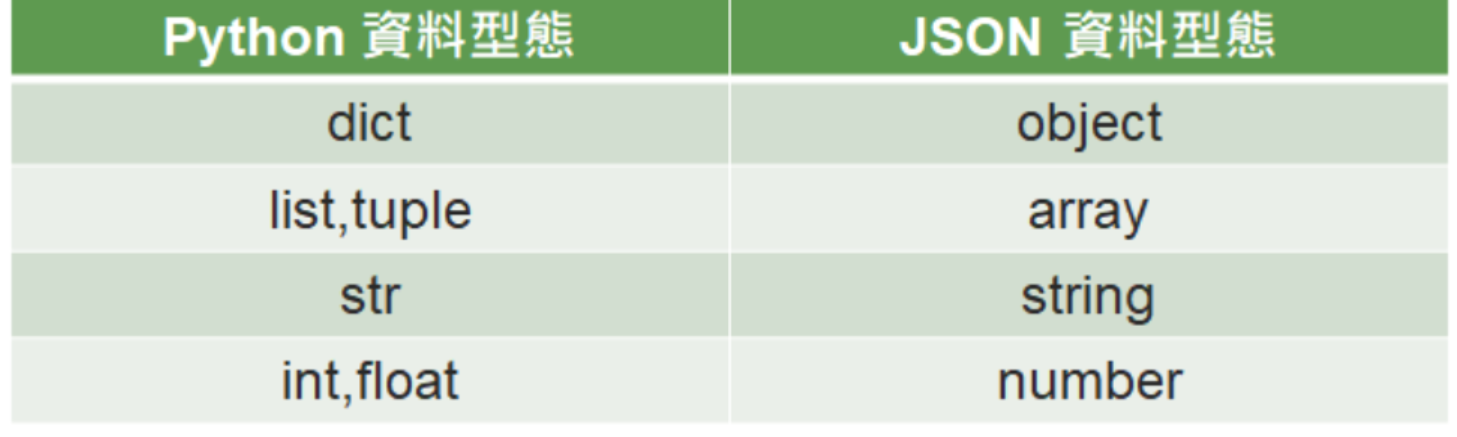
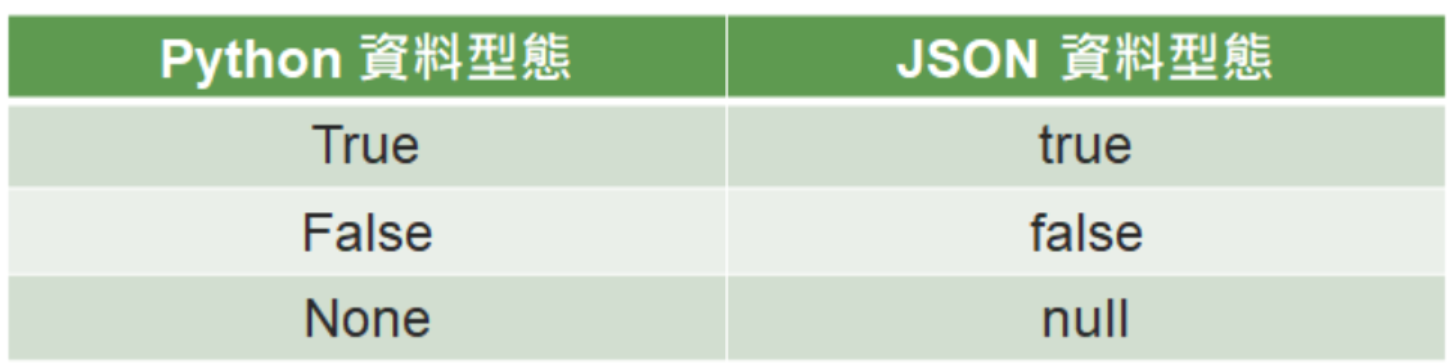
+ 以 json.dumps( ) 函數從 Python 物件轉入 轉出JSON格式字串。
+ 以 json.dump( )函數從 Python 物件轉入 轉出JSON 檔案中。
+ json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入以下的參數才可以正確處理UTF8碼內容

In [23]:
import json
json1 =  {'python':"課程","gjun":100,"python-class":True,"Line":None}
print(json1)
print(type(json1))
jsonStr = json.dumps(json1,ensure_ascii=False)
print(jsonStr)


{'python': '課程', 'gjun': 100, 'python-class': True, 'Line': None}
<class 'dict'>
{"python": "課程", "gjun": 100, "python-class": true, "Line": null}


In [24]:
import json
json2 =  {'python':"課程","gjun":100,"python-class":True,"Line":None}
outFile = open("data0.json","w",encoding="utf-8")
json.dump(json2,outFile,ensure_ascii=False)
outFile.close()

In [31]:
import json
data = { }
data['people'] = [ ]
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
#data.json
with open("data.json","w",encoding="utf-8") as outFile:
    json.dump(data,outFile,ensure_ascii=False,indent=2)

### Json 轉為 Python物件
+ 以 json.loads( ) 函數從 JSON 字串中取出資料轉入 Python。
+ 以 json.load( ) 函數從 JSON 檔案中取出資料轉入 Python。

In [34]:
import json
json1 = '{"python":"good","gjun":100,"python-class":true,"ICQ":null}'
json2 = json.loads(json1)
print(json2)
print(type(json2))

{'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}
<class 'dict'>


In [38]:
import json
with open("data.json","r",encoding="utf-8") as  jsonFile:
    data = json.load(jsonFile)
    peopleList = data["people"]
    for peDict in peopleList:
        for key in peDict:
            print(key,peDict[key])
        print("====================")    

name Scott
website stackabuse.com
from Nebraska
name Larry
website google.com
from Michigan


## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [42]:
import os
class TestFile:
    def openFile(self,filePath):
        self.handle = open(filePath,"w")
        #self.handle.close()
t =  TestFile()
t.openFile("test.txt")
os.remove("test.txt")
print("Success")

PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'test.txt'

## With 方式操作檔案
+ 多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
+ 以 with 方式操作檔案：
  + 檔案存取仍有可能產生 IO 例外。
  + 離開 with 區塊時檔案將會自動進行 close( ) 動作，自動關閉檔案。

In [44]:
import os
class TestFile:
    def openFile(self,filePath):
        with open(filePath,"w") as f:
            f.write("Hello!")
       
t =  TestFile()
t.openFile("test.txt")
os.remove("test.txt")
print("Success")

Success


## 壓縮與解壓縮 測試資料

In [45]:
import shutil
import os
try:
    os.mkdir('test2')
    print('建立目錄')
except:
    print('建立目錄失敗')

with open('./test2/test2.txt', 'a') as file2:
    file2.write('Programming is Fun.')
    print('完成附加檔案')
    
with open('./test2/test3.txt', 'a') as file2:
    file2.write('Programiz for beginners')
    print('完成附加檔案')
    
print('查看目錄內容')
os.listdir('./test2')

建立目錄
完成附加檔案
完成附加檔案
查看目錄內容


['test2.txt', 'test3.txt']

## 壓縮與解壓縮
### 但可以於Python程式內運用，可實現以下功能：
#### 建立zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的write()動作將資料夾壓縮。
#### 解壓縮zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的extractall()動作解壓縮。
#### 列出zip壓縮檔案內容
+透過zipfile.ZipFile( )建立物件，再透過物件的namelist()動作查看。

In [51]:
import zipfile
def create_zip(path):
    zf = zipfile.ZipFile(f"{path}.zip","w",zipfile.ZIP_DEFLATED)
    for root,dirs,files in os.walk(path):
        for file_name in files:
            zf.write(os.path.join(root,file_name))
def ziplist(path):
    zf = zipfile.ZipFile(path,"r")
    print(zf.namelist())
def extra_zip(path):
    zf = zipfile.ZipFile(path,"r")
    zf.extractall()
    
#create_zip("test2")
#ziplist("test2.zip")
extra_zip("test2.zip")

In [ ]:
import zipfile
def create_zip(path):
    zf = zipfile.ZipFile(f"{path}.zip","w",zipfile.ZIP_DEFLATED)
    for root,dirs,files in os.walk(path):
        for file_name in files:
            zf.write(os.path.join(root,file_name))
def ziplist(path):
    zf = zipfile.ZipFile(path,"r")
    print(zf.namelist())
def extra_zip(path):
    zf = zipfile.ZipFile(path,"r")
    zf.extratcall()
    
create_zip("test2")
ziplist("test2.zip")
#extra_zip("test2.zip")